In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use('seaborn-bright')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *
from xgboost import XGBRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from statsmodels.graphics.tsaplots import *
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
data = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\GTWYDaily.csv', index_col=0, parse_dates=True)

data.head()

,Electric,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,,
2008-05-23,21.259812,4.716729,0.102063,13.193333,9.482083,1013.916667,78.416667,3.830833
2008-05-24,9.742125,4.643917,0.001313,12.617500,8.603750,1013.958333,76.875000,7.959167
2008-05-25,9.466250,4.789521,0.001104,11.202083,9.725417,1014.250000,90.625000,7.675000
2008-05-26,9.720917,4.913646,0.002917,12.089167,8.680417,1014.333333,79.750000,9.237917
2008-05-27,9.453167,4.650792,0.004125,11.814583,10.532500,1011.708333,92.000000,4.222917


In [3]:
data.describe()

,Electric,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,65.110404,36.410451,0.162880,10.480013,7.324636,1014.425663,82.011092,4.410895
std,24.416421,40.828944,0.144792,5.365918,4.745279,10.989824,8.513722,1.796035
min,9.453167,0.000000,-0.000417,-6.250000,-6.898750,972.791667,53.083333,0.822917
25%,45.254062,4.186875,0.006667,6.456146,3.792604,1007.760417,75.875000,3.079375
50%,62.753333,5.870833,0.170094,10.547917,7.558333,1015.458333,82.500000,4.189792
75%,86.230776,68.828099,0.270854,14.742083,11.055625,1021.833333,88.541667,5.529479
max,119.776333,209.571000,0.924167,26.625417,18.644167,1047.125000,100.000000,12.804583


In [4]:
# data = data.loc[:'2020-03-15']

In [5]:
X, y = data.drop('Electric', axis=1), data['Electric']

X

,Gas,Water,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,
2008-05-23,4.716729,0.102063,13.193333,9.482083,1013.916667,78.416667,3.830833
2008-05-24,4.643917,0.001313,12.617500,8.603750,1013.958333,76.875000,7.959167
2008-05-25,4.789521,0.001104,11.202083,9.725417,1014.250000,90.625000,7.675000
2008-05-26,4.913646,0.002917,12.089167,8.680417,1014.333333,79.750000,9.237917
2008-05-27,4.650792,0.004125,11.814583,10.532500,1011.708333,92.000000,4.222917
...,...,...,...,...,...,...,...
2022-02-24,90.713354,0.000000,5.173333,1.981667,1008.750000,80.208333,7.111667
2022-02-25,92.109000,0.000000,6.274167,2.117083,1024.291667,75.083333,5.198333
2022-02-26,3.954271,-0.000417,5.840417,1.968750,1028.250000,76.916667,5.150833


In [6]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<AxesSubplot:xlabel='Datetime'>

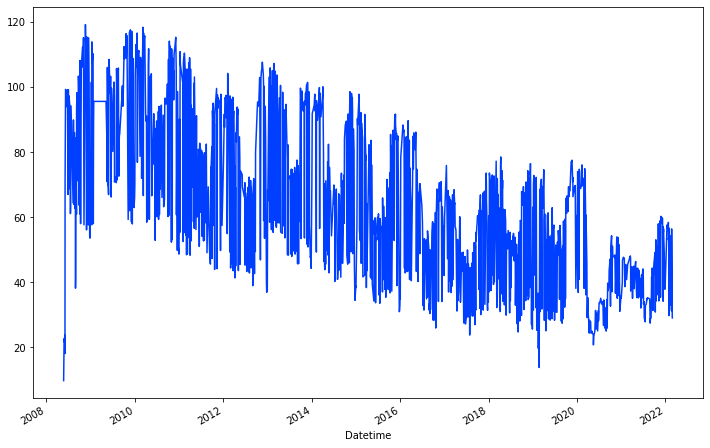

In [8]:
y_test.plot()

In [9]:
# xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree = 1, learning_rate = 0.001, max_depth = 7, alpha = 10, n_estimators = 5000)

xg_reg = XGBRegressor(n_estimators = 25000, learning_rate=0.001)

# xg_reg = XGBRegressor(objective='reg:squarederror',
#     n_estimators=5000,
#     learning_rate=0.1,
#     subsample=0.5,
#     colsample_bytree=1, 
#     max_depth=7,
# )

In [10]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)


print("RMSE: %.3f" % (rmse))
print("MSE: %.3f" % (mse))
print("MAE: %.3f" % (mae))
print("R2 Score: %.3f" % (r2))

RMSE: 12.894
MSE: 166.250
MAE: 9.679
R2 Score: 0.715


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

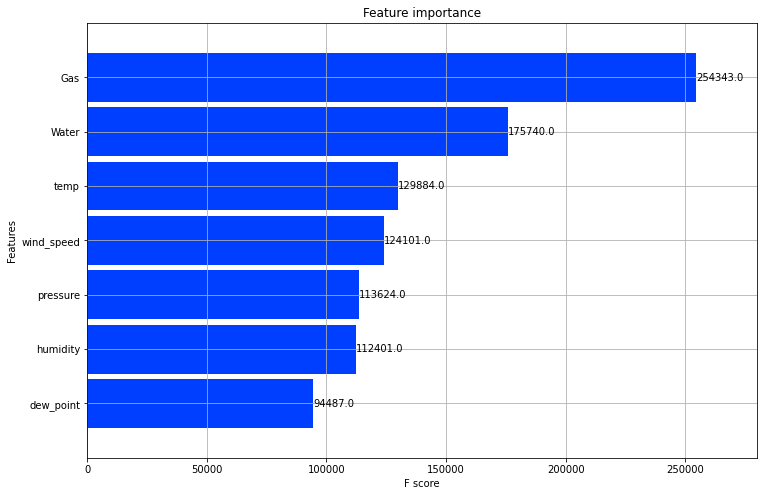

In [12]:
from xgboost import plot_importance

feature_importance = plot_importance(xg_reg, height=0.9)
feature_importance

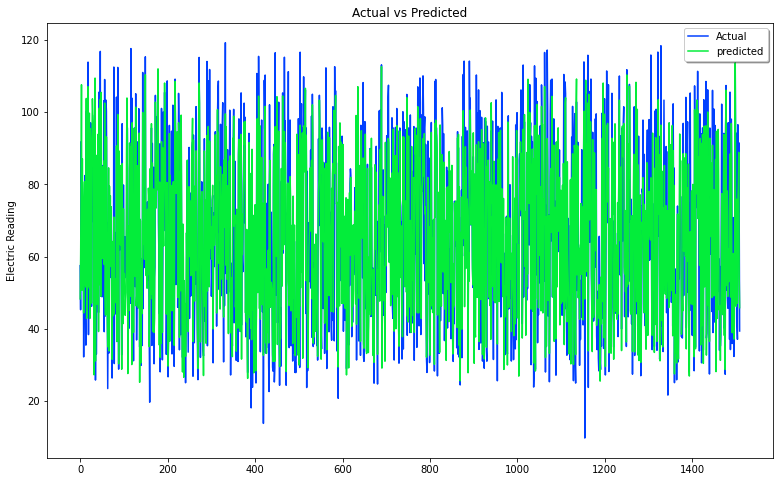

In [13]:
plt.figure(figsize=(13,8))
plt.plot(list(y_test))
plt.plot(list(preds))
plt.title("Actual vs Predicted")
plt.ylabel("Electric Reading")
plt.legend(('Actual','predicted'), shadow=True)
plt.show()

In [14]:
# params = {"objective":"reg:squarederror",
#             'colsample_bytree': 1,
#             'learning_rate': 0.1,
#             'max_depth': 7, 
#             'alpha': 10}

# cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=50,
#                     num_boost_round=999,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=123)

In [15]:
# cv_results.head()

In [16]:
# print((cv_results["test-rmse-mean"]).tail(1))